# 英文NLP基礎教學

In [1]:
import pandas as pd

import nltk

from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


from nltk.corpus import stopwords
stops = stopwords.words('english')
from string import punctuation

In [2]:
testStr = "This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts."
# 請使用nltk.word_tokenize及nltk.wordpunct_tokenize進行分詞，並比較其中差異。
#=============your works starts===============#
word_tokenize_tokens = nltk.word_tokenize(testStr)
wordpunct_tokenize_tokens = nltk.wordpunct_tokenize(testStr)
#==============your works ends================#

print("/".join(word_tokenize_tokens))
print("/".join(wordpunct_tokenize_tokens))
# This/value/is/also/called/cut-off/in/the/literature/./If/float/,/the/parameter/represents/a/proportion/of/documents/,/integer/absolute/counts/.
# This/value/is/also/called/cut/-/off/in/the/literature/./If/float/,/the/parameter/represents/a/proportion/of/documents/,/integer/absolute/counts/.

This/value/is/also/called/cut-off/in/the/literature/./If/float/,/the/parameter/represents/a/proportion/of/documents/,/integer/absolute/counts/.
This/value/is/also/called/cut/-/off/in/the/literature/./If/float/,/the/parameter/represents/a/proportion/of/documents/,/integer/absolute/counts/.


In [3]:
tokens = wordpunct_tokenize_tokens
df = pd.DataFrame(index = tokens)
# 請使用porter_stemmer, lancaster_stemmer, snowball_stemmer, wordnet_lemmatizer，進行stemming或是lemmatize，並放到一個df比較其中差異
#=============your works starts===============#
df['porter_stemmer'] = [porter_stemmer.stem(t) for t in tokens]
df['lancaster_stemmer'] = [lancaster_stemmer.stem(t) for t in tokens]
df['snowball_stemmer'] = [snowball_stemmer.stem(t) for t in tokens]
df['wordnet_lemmatizer'] = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
#==============your works ends================#

print(df.iloc[0].tolist())
print(df.iloc[1].tolist())
# ['thi', 'thi', 'this', 'This']
# ['valu', 'valu', 'valu', 'value']

df

['thi', 'thi', 'this', 'This']
['valu', 'valu', 'valu', 'value']


,porter_stemmer,lancaster_stemmer,snowball_stemmer,wordnet_lemmatizer
This,thi,thi,this,This
value,valu,valu,valu,value
is,is,is,is,is
also,also,also,also,also
called,call,cal,call,called
cut,cut,cut,cut,cut
-,-,-,-,-
off,off,off,off,off
in,in,in,in,in
the,the,the,the,the


In [4]:
print("標點符號")
print(punctuation)
print("停用字")
print(stops)

標點符號
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
停用字
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

In [5]:
df = pd.DataFrame(index = [t for t in tokens if t not in stops and t not in punctuation])
# 請使用porter_stemmer, lancaster_stemmer, snowball_stemmer, wordnet_lemmatizer，進行stemming或是lemmatize，並放到一個df比較其中差異
# 請去除標點符號與停用字
#=============your works starts===============#
df['porter_stemmer'] = [porter_stemmer.stem(t.lower()) for t in tokens if t not in stops and t not in punctuation]
df['lancaster_stemmer'] = [lancaster_stemmer.stem(t.lower()) for t in tokens if t not in stops and t not in punctuation]
df['snowball_stemmer'] = [snowball_stemmer.stem(t.lower()) for t in tokens if t not in stops and t not in punctuation]
df['wordnet_lemmatizer'] = [wordnet_lemmatizer.lemmatize(t.lower()) for t in tokens if t not in stops and t not in punctuation]
#==============your works ends================#

df

,porter_stemmer,lancaster_stemmer,snowball_stemmer,wordnet_lemmatizer
This,thi,thi,this,this
value,valu,valu,valu,value
also,also,also,also,also
called,call,cal,call,called
cut,cut,cut,cut,cut
literature,literatur,lit,literatur,literature
If,if,if,if,if
float,float,flo,float,float
parameter,paramet,paramet,paramet,parameter
represents,repres,repres,repres,represents


In [6]:
df_tag = pd.DataFrame(index = tokens)
# 請使用nltk.pos_tag進行詞性標記，並嘗試設定參數tagset='universal'
#=============your works starts===============#
df_tag['default'] = [tag for term, tag in nltk.pos_tag(tokens)]
df_tag['universal'] = [tag for term, tag in nltk.pos_tag(tokens, tagset='universal')]
#==============your works ends================#

df_tag

,default,universal
This,DT,DET
value,NN,NOUN
is,VBZ,VERB
also,RB,ADV
called,VBN,VERB
cut,VBN,VERB
-,:,.
off,RB,ADV
in,IN,ADP
the,DT,DET


# 建立詞向量

In [7]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

from nltk.corpus import stopwords
stops = stopwords.words('english')
from string import punctuation

In [8]:
corpus = ["what time is it?", "how long has it been since we started?", "that's a long time ago"]
df = pd.DataFrame(corpus, columns=['sentence'])
df

,sentence
0,what time is it?
1,how long has it been since we started?
2,that's a long time ago


In [9]:
# 請使用nltk.word_tokenize將每一行的詞彙切開
#=============your works starts===============#
df['tokenize'] = df['sentence'].apply(nltk.word_tokenize)
#==============your works ends================#


df['tokenize']
# 0                              [what, time, is, it, ?]
# 1    [how, long, has, it, been, since, we, started, ?]
# 2                       [that, 's, a, long, time, ago]
# Name: tokenize, dtype: object

0                              [what, time, is, it, ?]
1    [how, long, has, it, been, since, we, started, ?]
2                       [that, 's, a, long, time, ago]
Name: tokenize, dtype: object

In [10]:
# 請找出不重複的所有出現過的字
#=============your works starts===============#
word_index = set(np.hstack([tokens for tokens in df['tokenize']]))
#==============your works ends================#

print("len(word_index)", len(word_index))
print(word_index)
# len(word_index) 16
# {'is', 'that', 'time', 'long', 'we', 'ago', 'started', 'has', 'been', 'a', "'s", 'how', 'what', 'it', 'since', '?'}

len(word_index) 16
{'long', 'what', "'s", 'that', 'time', 'ago', 'since', '?', 'a', 'started', 'has', 'how', 'we', 'it', 'been', 'is'}


In [11]:
for column in word_index:
    # 請幫每一個字創造一個欄位並指派為0
    #=============your works starts===============#
    df[column] = 0
    #==============your works ends================#

    
print(df.columns)
df
# Index(['sentence', 'tokenize', 'is', 'that', 'time', 'long', 'we', 'ago',
#        'started', 'has', 'been', 'a', ''s', 'how', 'what', 'it', 'since', '?'],
#       dtype='object')

Index(['sentence', 'tokenize', 'long', 'what', ''s', 'that', 'time', 'ago',
       'since', '?', 'a', 'started', 'has', 'how', 'we', 'it', 'been', 'is'],
      dtype='object')


,sentence,tokenize,long,what,'s,that,time,ago,since,?,a,started,has,how,we,it,been,is
0,what time is it?,"[what, time, is, it, ?]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,how long has it been since we started?,"[how, long, has, it, been, since, we, started, ?]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,that's a long time ago,"[that, 's, a, long, time, ago]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
def build_word_index(row):
    tokens = row['tokenize']
    for token in tokens:
        # 請幫計算每個字，在這個句子中出現的次數
        #=============your works starts===============#
        row[token] += 1
        #==============your works ends================#
    return row

df_processed = df.apply(build_word_index, axis=1)

print(df_processed.iloc[0].tolist())
# ['what time is it?', ['what', 'time', 'is', 'it', '?'], 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
df_processed

['what time is it?', ['what', 'time', 'is', 'it', '?'], 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]


,sentence,tokenize,long,what,'s,that,time,ago,since,?,a,started,has,how,we,it,been,is
0,what time is it?,"[what, time, is, it, ?]",0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1
1,how long has it been since we started?,"[how, long, has, it, been, since, we, started, ?]",1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0
2,that's a long time ago,"[that, 's, a, long, time, ago]",1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0


# 中文NLP教學

In [13]:
import jieba
jieba.set_dictionary('dict.txt.big')  # 如果是使用繁體文字，請記得去下載繁體字典來使用
with open('stops.txt', 'r', encoding='utf8') as f:  # 中文的停用字，我也忘記從哪裡拿到的，效果還可以，繁體字的資源真的比較少，大家將就一下吧
    stops = f.read().split('\n') 

In [14]:
# 請使用jieba.cut進行斷詞，並嘗試使用全斷詞模式(cut_all=True)
#=============your works starts===============#
result_cut = [t for t in jieba.cut('下雨天留客天留我不留')]
result_cutall = [t for t in jieba.cut('下雨天留客天留我不留', cut_all=True)]
#==============your works ends================#


print(result_cut)
print(result_cutall)
# ['下雨天', '留客', '天留', '我', '不留']
# ['下雨', '下雨天', '雨天', '留客', '天', '留', '我', '不留']

Building prefix dict from D:\Projects\IIIMaterial\08_IrTheory\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u113aa1b94b8c59a47d44fb9a8d37f14b.cache
Loading model cost 1.589 seconds.
Prefix dict has been built succesfully.


['下雨天', '留客', '天留', '我', '不留']
['下雨', '下雨天', '雨天', '留客', '天', '留', '我', '不留']


In [15]:
print("停用字")
print(stops[:100])

停用字
['\ufeff\ufeff,', '', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '人民', '末##末', '啊', '阿', '哎', '哎呀', '哎喲', '唉', '我', '我們', '按', '按照', '依照', '吧', '吧噠', '把', '罷了', '被', '本', '本著', '比', '比方', '比如', '鄙人', '彼', '彼此', '邊', '別', '別的', '別說', '並', '並且', '不比', '不成', '不單', '不但', '不獨', '不管', '不光', '不過', '不僅', '不拘', '不論', '不怕', '不然', '不如', '不特', '不惟', '不問', '不只', '朝', '朝著', '趁', '趁著', '乘', '沖', '除', '除此之外', '除非', '除了', '此', '此間', '此外', '從', '從而', '打', '待', '但', '但是', '當', '當著', '到', '得', '的', '的話', '等', '等等', '地', '第', '叮咚', '對', '對於', '多', '多少', '而', '而況', '而且']


In [16]:
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

testStr = """自然語言處理大體是從1950年代開始，雖然更早期也有作為。1950年，圖靈發表論文「電腦器與智慧型」，提出現在所謂的「圖靈測試」作為判斷智慧型的條件。
1954年的喬治城實驗涉及全部自動翻譯超過60句俄文成為英文。研究人員聲稱三到五年之內即可解決機器翻譯的問題。[1]不過實際進展遠低於預期，1966年的ALPAC報告發現十年研究未達預期目標，機器翻譯的研究經費遭到大幅削減。一直到1980年代末期，統計機器翻譯系統發展出來，機器翻譯的研究才得以更上一層樓。
1960年代發展特別成功的NLP系統包括SHRDLU——一個詞彙設限、運作於受限如「積木世界」的一種自然語言系統，以及1964-1966年約瑟夫·維森鮑姆類比「個人中心治療」而設計的ELIZA——幾乎未運用人類思想和感情的訊息，有時候卻能呈現令人訝異地類似人之間的互動。「病人」提出的問題超出ELIZA 極小的知識範圍之時，可能會得到空泛的回答。例如問題是「我的頭痛」，回答是「為什麼說你頭痛？」
1970年代，程式設計師開始設計「概念本體論」（conceptual ontologies）的程式，將現實世界的資訊，架構成電腦能夠理解的資料。實例有MARGIE、SAM、PAM、TaleSpin、QUALM、Politics以及Plot Unit。許多聊天機器人在這一時期寫成，包括PARRY 、Racter 以及Jabberwacky 。
一直到1980年代，多數自然語言處理系統是以一套複雜、人工訂定的規則為基礎。不過從1980年代末期開始，語言處理引進了機器學習的演算法，NLP產生革新。成因有兩個：運算能力穩定增加（參見摩爾定律）；以及喬姆斯基 語言學理論漸漸喪失主導（例如轉換-生成文法）。該理論的架構不傾向於語料庫——機器學習處理語言所用方法的基礎。有些最早期使用的機器學習演算法，例如決策樹，是硬性的、「如果-則」規則組成的系統，類似當時既有的人工訂定的規則。不過詞性標記將隱馬爾可夫模型引入NLP，並且研究日益聚焦於軟性的、以機率做決定的統計模型，基礎是將輸入資料裡每一個特性賦予代表其份量的數值。許多語音識別現今依賴的快取語言模型即是一種統計模型的例子。這種模型通常足以處理非預期的輸入資料，尤其是輸入有錯誤（真實世界的資料總免不了），並且在整合到包含多個子任務的較大系統時，結果比較可靠。
許多早期的成功屬於機器翻譯領域，尤其歸功IBM的研究，漸次發展出更複雜的統計模型。這些系統得以利用加拿大和歐盟現有的語料庫，因為其法律規定政府的會議必須翻譯成所有的官方語言。不過，其他大部分系統必須特別打造自己的語料庫，一直到現在這都是限制其成功的一個主要因素，於是大量的研究致力於從有限的資料更有效地學習。
近來的研究更加聚焦於非監督式學習和半監督學習的演算法。這種演算法，能夠從沒有人工註解理想答案的資料裡學習。大體而言，這種學習比監督學習困難，並且在同量的資料下，通常產生的結果較不準確。不過沒有註解的資料量極巨（包含了全球資訊網），彌補了較不準確的缺點。
近年來, 深度學習技巧紛紛出爐[2][3] 在自然語言處理方面獲得最尖端的成果，例如語言模型[4]、語法分析[5][6]等等。"""

# 請用全斷詞模式對上面文章段落進行分詞
# 然後計算每一個詞彙出現過的次數，並將出現較多次的排到前面
#=============your works starts===============#
terms = [t for t in jieba.cut(testStr, cut_all=True) if t not in stops]
terms_sorted =  sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)
#==============your works ends================#

print(terms_sorted)

[('語言', 10), ('學習', 10), ('機器', 9), ('研究', 8), ('系統', 8), ('資料', 8), ('翻譯', 7), ('模型', 7), ('處理', 6), ('年代', 6), ('機器翻譯', 5), ('自然', 4), ('自然語言', 4), ('年', 4), ('統計', 4), ('\n', 4), ('演算', 4), ('演算法', 4), ('算法', 4), ('早期', 3), ('問題', 3), ('預期', 3), ('一直', 3), ('直到', 3), ('1980', 3), ('發展', 3), ('成功', 3), ('NLP', 3), ('一個', 3), ('世界', 3), ('設計', 3), ('許多', 3), ('人工', 3), ('規則', 3), ('基礎', 3), ('語料', 3), ('語料庫', 3), ('輸入', 3), ('這種', 3), ('監督', 3), ('1950', 2), ('作', 2), ('圖靈', 2), ('電腦', 2), ('智慧', 2), ('智慧型', 2), ('提出', 2), ('現在', 2), ('1966', 2), ('未', 2), ('末期', 2), ('展出', 2), ('得以', 2), ('特別', 2), ('包括', 2), ('一種', 2), ('ELIZA', 2), ('類似', 2), ('回答', 2), ('頭痛', 2), ('程式', 2), ('資訊', 2), ('架構', 2), ('能夠', 2), ('複雜', 2), ('訂定', 2), ('產生', 2), ('理論', 2), ('聚焦', 2), ('裡', 2), ('通常', 2), ('非', 2), ('尤其', 2), ('包含', 2), ('督學', 2), ('註解', 2), ('不準', 2), ('準確', 2), ('是從', 1), ('更早', 1), ('發表', 1), ('論文', 1), ('器', 1), ('出現', 1), ('所謂', 1), ('測試', 1), ('判斷', 1), ('條件', 1), ('\n1954', 1), ('喬

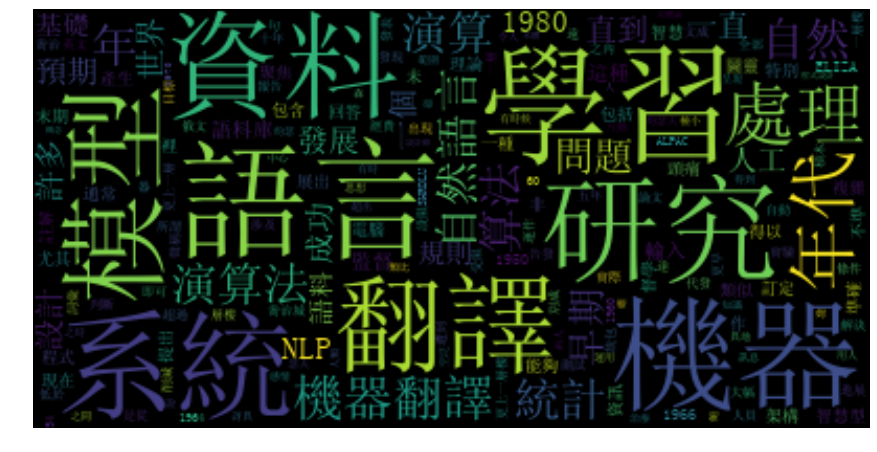

In [17]:
wordcloud = WordCloud(font_path="simsun.ttf") # 注意必須放數中文字體，否則會變亂碼
wordcloud.generate_from_frequencies(frequencies=Counter(terms))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

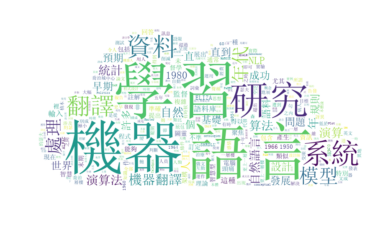

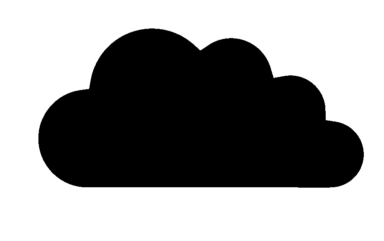

In [18]:
from PIL import Image

alice_mask = np.array(Image.open("cloud_mask7.png"))
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, font_path="simsun.ttf")
wc.generate_from_frequencies(Counter(terms))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# 中文檢索系統

1. TFIDF
$$TFIDF_{td} = TF_{td} \times log(\frac{N}{DF_t})$$
    - 所謂TFIDF應分成兩個部分來理解：TF(Term Frequency)以及IDF(Inverted Document Frequency)。
    - TF(Term Frequency): $TF_{td}$指得是在特定的文章d中特定的字t出現了幾次。這個部分同時，也表示了一個文字在一篇文章的重要性，依但出現越多次，這個字也就越能代表這篇文章。
    - IDF(Inverted Document Frequency): N指得是總共有機篇文章，$DF_t$中的DF是Document Frequency的意思，DFt則是詞彙t在幾篇文章中出現過。$\frac{DF_t}{N}$也就是所有文章當中，詞彙t在幾篇文章出現過，而其倒數則是Inverted Documnet Index，表著這個詞彙如果在很多文章裏面都出現過，則其重要性會受到懲罰，而取log則只是讓他在分數的影響上比較平滑而已。
    
    
2. Cosine Similarity
$$\cos{\theta} = \frac{A \cdot B}{\| {A} \|_2 \| {B} \|_2}$$
    - if $A = [1,2,0,4]$ and $B = [3,2,1,0]$
    - $\cos{\theta} = \frac{1 \cdot 3 + 2 \cdot 2 + 0 \cdot 1 + 4 \cdot 0} {\sqrt{1^2+2^2+0^2+4^2} \cdot \sqrt{3^2+2^2+1^2+0^2}}$

In [19]:
import jieba
jieba.set_dictionary('dict.txt.big')  # 如果是使用繁體文字，請記得去下載繁體字典來使用
import numpy as np
import pandas as pd

In [20]:
# 把檔案讀出來(原始資料: https://society.hccg.gov.tw/ch/home.jsp?id=43&parentpath=0,5)
df_QA = pd.read_json('ProcessedData.json', encoding='utf8')
# 我們這次只會使用到question跟ans這兩個欄位
df_question = df_QA[['question', 'ans']].copy()  ## 不要更動到原始的DataFrame
df_question.drop_duplicates(inplace=True)  ## 丟掉重複的資料
df_question.head(5)  ## show出來

,question,ans
0,小孩出生後應於何時申請育兒津貼?,1.幼兒家長在戶政事務所完成新生兒出生登記後，即可向所轄區公所社政課提出育兒津貼申請。2.在...
1,小孩出生後應於何時申請育兒津貼?,隨時提出;津貼經審查通過後，追溯自受理申請之當月起發給。兒童出生後六十日內向戶政事務所完成出...
2,育兒津貼申請應備文件為何?,申請資料應備齊:(一)兒童之戶口名簿影本。(二)申請人之郵局存摺封面影本。(三)父母雙方身分...
3,若民眾夫妻雙方均失業，是否可申請家庭育兒津貼費用補助,一、育兒津貼補助對象：1.育有二足歲以下兒童。2.兒童之父母至少一方因育兒需要，致未能就業者...
4,育兒津貼補助對象為何？,育兒津貼補助對象，應符合下列規定：(一)育有二足歲以下兒童。(二)兒童之父母(或監護人)至少...


In [21]:
#前處理
all_terms = []
def preprocess(item):  ##定義前處理的function
    # 請把將每一行用jieba.cut進行分詞(記得將cut_all設定為True)
    # 同時建立所有詞彙的list(all_terms)
    #=============your works starts===============#
    terms = [t for t in jieba.cut(item, cut_all=True)]  ## 把全切分模式打開，可以比對的詞彙比較多
    all_terms.extend(terms)  ## 收集所有出現過的字
    #==============your works ends================#
    return terms

df_question['processed'] = df_question['question'].apply(preprocess)
print(df_question.iloc[0])
# question                                      小孩出生後應於何時申請育兒津貼?
# ans          1.幼兒家長在戶政事務所完成新生兒出生登記後，即可向所轄區公所社政課提出育兒津貼申請。2.在...
# processed                  [小孩, 出生, 後, 應於, 何時, 申請, 育兒, 津貼, , ]
# Name: 0, dtype: object

df_question.head()

Building prefix dict from D:\Projects\IIIMaterial\08_IrTheory\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u113aa1b94b8c59a47d44fb9a8d37f14b.cache
Loading model cost 1.931 seconds.
Prefix dict has been built succesfully.


question                                      小孩出生後應於何時申請育兒津貼?
ans          1.幼兒家長在戶政事務所完成新生兒出生登記後，即可向所轄區公所社政課提出育兒津貼申請。2.在...
processed                  [小孩, 出生, 後, 應於, 何時, 申請, 育兒, 津貼, , ]
Name: 0, dtype: object


,question,ans,processed
0,小孩出生後應於何時申請育兒津貼?,1.幼兒家長在戶政事務所完成新生兒出生登記後，即可向所轄區公所社政課提出育兒津貼申請。2.在...,"[小孩, 出生, 後, 應於, 何時, 申請, 育兒, 津貼, , ]"
1,小孩出生後應於何時申請育兒津貼?,隨時提出;津貼經審查通過後，追溯自受理申請之當月起發給。兒童出生後六十日內向戶政事務所完成出...,"[小孩, 出生, 後, 應於, 何時, 申請, 育兒, 津貼, , ]"
2,育兒津貼申請應備文件為何?,申請資料應備齊:(一)兒童之戶口名簿影本。(二)申請人之郵局存摺封面影本。(三)父母雙方身分...,"[育兒, 津貼, 申請, 應, 備, 文件, 為, 何, , ]"
3,若民眾夫妻雙方均失業，是否可申請家庭育兒津貼費用補助,一、育兒津貼補助對象：1.育有二足歲以下兒童。2.兒童之父母至少一方因育兒需要，致未能就業者...,"[若, 民, 眾, 夫妻, 雙方, 均, 失業, , , 是否, 可, 申請, 家庭, 育兒..."
4,育兒津貼補助對象為何？,育兒津貼補助對象，應符合下列規定：(一)育有二足歲以下兒童。(二)兒童之父母(或監護人)至少...,"[育兒, 津貼, 貼補, 補助, 對象, 為, 何, , ]"


In [22]:
# 建立termindex: 將all_terms取出不重複的詞彙，並轉換型別為list(避免順序亂掉)
#=============your works starts===============#
termindex = list(set(all_terms))
#==============your works ends================#

print("len(termindex)", len(termindex))
print(termindex[:10])
# len(termindex) 1012
# ['', '耗材', '被', '其他', '發', '發現', '申請人', '遭遇', '環境', '您好']

len(termindex) 1012
['', '證', '災害', '重要', '之人', '偶或', '到', '民', '耗材', '幫忙']


In [23]:
# 建立IDF vector
Doc_Length = len(df_question)  ## 計算出共有幾篇文章
Idf_vector = []  ## 初始化IDF向量
for term in termindex:  ## 對index中的詞彙跑回圈
    num_of_doc_contains_term = 0  ## 計算有機篇文章出現過這個詞彙
    for terms in df_question['processed']:
        if term in terms:
            num_of_doc_contains_term += 1
    idf = np.log(Doc_Length/num_of_doc_contains_term)  ## 計算該詞彙的IDF值
    Idf_vector.append(idf)
print(len(Idf_vector))
print(Idf_vector[:10])

1012
[0.04710446918747347, 5.093750200806762, 5.786897381366708, 5.786897381366708, 5.786897381366708, 5.786897381366708, 4.688285092698598, 4.400603020246817, 5.786897381366708, 5.786897381366708]


In [24]:
# 建立document vector
def terms_to_vector(terms):  ## 定義把terms轉換成向量的function
    ## 建立一條與termsindex等長、但值全部為零的向量(hint:dtype=np.float32)
    #=============your works starts===============#
    vector = np.zeros_like(termindex, dtype=np.float32)  
    #==============your works ends================#
    
    for term, count in Counter(terms).items():
        # 計算vector上每一個字的tf值
        #=============your works starts===============#
        vector[termindex.index(term)] = count
        #==============your works ends================#

    # 計算tfidf，element-wise的將vector與Idf_vector相乘
    ## hint: 如果兩個vector的型別都是np.array，把兩條vector相乘，就會自動把向量中的每一個元素成在一起，建立出一條新的向量
    #=============your works starts===============#
    vector = vector * Idf_vector
    #==============your works ends================#
    return vector



df_question['vector'] = df_question['processed'].apply(terms_to_vector)  ## 將上面定義的function，套用在每一筆資料的terms欄位上
df_question['vector'][:10]
# 0    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 1    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 2    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 3    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 4    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 5    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 6    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 7    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 8    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
# 9    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
# Name: vector, dtype: object

0    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
1    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
2    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
4    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
5    [0.09420893837494694, 0.0, 0.0, 0.0, 0.0, 0.0,...
6    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
7    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
8    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
9    [0.28262681512484084, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: vector, dtype: object

In [25]:
from numpy.linalg import norm

def cosine_similarity(vector1, vector2):  ## 定義cosine相似度的計算公式
    # 使用np.dot與norm計算cosine score
    #=============your works starts===============#
    score = np.dot(vector1, vector2)  / (norm(vector1) * norm(vector2))
    #==============your works ends================#
    return score

sentence1 = df_question.loc[0]  ##取出第零個的問題
sentence2 = df_question.loc[2]  ##取出第二個的問題
print(sentence1['question'])
print(sentence2['question'])
print(cosine_similarity(sentence1['vector'], sentence2['vector']))  ##計算兩者的相似度
# 0.203227847937731

小孩出生後應於何時申請育兒津貼?
育兒津貼申請應備文件為何?
0.20322784793773094


In [26]:
def retrieve(testing_sentence, return_num=3):  ## 定義出檢索引擎
    # 請使用前面定義的terms_to_vector與preprocess兩個function，計算出testing_sentence的向量
    # 計算其與資料庫每一的問句的相似度
    # 依分數進行排序，找到分數最高的三個句子
    #=============your works starts===============#
    testing_vector = terms_to_vector(preprocess(testing_sentence))  ## 把剛剛的前處理、轉換成向量的function，應用在使用者輸入的問題上
    idx_score_mapping = [(idx, cosine_similarity(testing_vector, vec)) for idx, vec in enumerate(df_question['vector'])]
    top3_idxs = np.array(sorted(idx_score_mapping, key=lambda x:x[1], reverse=True))[:3, 0]
    #==============your works ends================#
    
    return df_question.loc[top3_idxs, ['question', 'ans']]


print(retrieve("老人年金").index)
# Float64Index([100.0, 111.0, 321.0], dtype='float64')


Float64Index([100.0, 111.0, 321.0], dtype='float64')


# Use Scikit learn

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer()
# 使用tfidf.fit_transform將轉換df_question['processed']為vector
#=============your works starts===============#
df_question['sklearn_vector'] = list(tfidf.fit_transform(df_question['processed'].apply(lambda x:" ".join(x)).values).toarray())
#==============your works ends================#

print(df_question.loc[:10, 'sklearn_vector'].apply(sum).values)
# [2.54619627 2.54619627 1.95695906 3.12409736 2.19106254 2.74144953
#  3.82923767 2.54569516 3.4163518  2.98088982 2.35528293]

[2.54619627 2.54619627 1.95695906 3.12409736 2.19106254 2.74144953
 3.82923767 2.54569516 3.4163518  2.98088982 2.35528293]


In [29]:
def sklearn_retrieve(testing_sentence, return_num=3):  ## 定義出檢索引擎
    # 請使用前面定義的tfidf.transform與preprocess兩個function，計算出testing_sentence的向量
    # 注意tfidf.transform必須是兩個維度的array
    # 且out為sparse metric，必需.toarray()轉換為一般np.array()
    # 計算其與資料庫每一的問句的相似度
    # 依分數進行排序，找到分數最高的三個句子
    #=============your works starts===============#
    testing_vector = tfidf.transform([" ".join(preprocess(testing_sentence))]).toarray()[0]
    idx_score_mapping = [(idx, cosine_similarity(testing_vector, vec)) for idx, vec in enumerate(df_question['sklearn_vector'])]
    top3_idxs = np.array(sorted(idx_score_mapping, key=lambda x:x[1], reverse=True))[:3, 0]
    #==============your works ends================#
    return df_question.loc[top3_idxs, ['question', 'ans']]

print(retrieve("老人年金")['question'])
print(sklearn_retrieve("老人年金")['question'])
# 100.0    我已經年滿65歲領有國民年金老人年金及基本保證年金3628元，因家境清寒還可以再申請中低收入...
# 111.0                            新竹市老人一般可領老人津貼6628元，該如何申請？
# 321.0           國民年金保險被保險人如果是家庭收入較低者，國民年金保險費是否可以減免？補助標準為何？
# Name: question, dtype: object
# 100.0    我已經年滿65歲領有國民年金老人年金及基本保證年金3628元，因家境清寒還可以再申請中低收入...
# 111.0                            新竹市老人一般可領老人津貼6628元，該如何申請？
# 321.0           國民年金保險被保險人如果是家庭收入較低者，國民年金保險費是否可以減免？補助標準為何？
# Name: question, dtype: object

100.0    我已經年滿65歲領有國民年金老人年金及基本保證年金3628元，因家境清寒還可以再申請中低收入...
111.0                            新竹市老人一般可領老人津貼6628元，該如何申請？
321.0           國民年金保險被保險人如果是家庭收入較低者，國民年金保險費是否可以減免？補助標準為何？
Name: question, dtype: object
100.0    我已經年滿65歲領有國民年金老人年金及基本保證年金3628元，因家境清寒還可以再申請中低收入...
111.0                            新竹市老人一般可領老人津貼6628元，該如何申請？
321.0           國民年金保險被保險人如果是家庭收入較低者，國民年金保險費是否可以減免？補助標準為何？
Name: question, dtype: object


In [30]:
print(retrieve("托育")['question'])
print(sklearn_retrieve("托育")['question'])


15.0                     托育費用補助對象為何？
14.0                     托育費用補助標準為何？
19.0    要申請托育補助一定要找加入居家托育服務中心的托育人員嗎？
Name: question, dtype: object
0.0    小孩出生後應於何時申請育兒津貼?
1.0    小孩出生後應於何時申請育兒津貼?
2.0       育兒津貼申請應備文件為何?
Name: question, dtype: object


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [31]:
print(retrieve("補助")['question'])
print(sklearn_retrieve("補助")['question'])


214.0          中低收入醫療補助補助項目及標準為何？
108.0              申請假牙補助的資格及補助內容
82.0     特殊境遇家庭法律訴訟補助如何申請？補助額度如何？
Name: question, dtype: object
108.0        申請假牙補助的資格及補助內容
15.0            托育費用補助對象為何？
214.0    中低收入醫療補助補助項目及標準為何？
Name: question, dtype: object


In [32]:
print(retrieve("救助")['question'])
print(sklearn_retrieve("救助")['question'])


204.0         社會福利-急難救助核發救助對象？
74.0     遭遇特殊境遇家庭如何申請救助(申請方式)？
203.0        社會福利-我要到那裡申請急難救助？
Name: question, dtype: object
204.0         社會福利-急難救助核發救助對象？
203.0        社會福利-我要到那裡申請急難救助？
74.0     遭遇特殊境遇家庭如何申請救助(申請方式)？
Name: question, dtype: object
